In [1]:
import numpy as np
from MLP import MultiLayerPerceptron, MultiLayerPerceptronBig
from matplotlib import pyplot as plt


# Train an MLP with 2 inputs, 3-4+ hidden units and one output on the
# following examples (XOR function):
((0, 0), 0)
((0, 1), 1)
((1, 0), 1)
((1, 1), 0)
Here we will try to find the best alpha and hidden unit size for the MLP by training it on the XOR function.

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

network = MultiLayerPerceptron(2, 10, 1)
network.randomise()

# Train the MLP
for epoch in range(10000):
    network.train(X, y, 0.2)

print(network.forward(X))

epoch 0
[[0.        ]
 [0.99990723]
 [0.99988346]
 [0.99999972]]
epoch 1
[[0.        ]
 [0.9994656 ]
 [0.99933428]
 [0.99999616]]
epoch 2
[[0.        ]
 [0.99727562]
 [0.99661858]
 [0.99995268]]
epoch 3
[[0.        ]
 [0.98762335]
 [0.98463399]
 [0.99947391]]
epoch 4
[[0.        ]
 [0.95048668]
 [0.93847197]
 [0.99486024]]
epoch 5
[[0.        ]
 [0.83774137]
 [0.79996031]
 [0.96053467]]
epoch 6
[[0.        ]
 [0.64154745]
 [0.57028733]
 [0.83388679]]
epoch 7
[[0.        ]
 [0.56222754]
 [0.49589405]
 [0.76021283]]
epoch 8
[[0.        ]
 [0.57487529]
 [0.52804127]
 [0.77382397]]
epoch 9
[[0.        ]
 [0.56045231]
 [0.52530612]
 [0.75824705]]
[[0.        ]
 [0.56045231]
 [0.52530612]
 [0.75824705]]


C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x) / np.cosh(x)
C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: overflow encountered in cosh
  return np.sinh(x) / np.cosh(x)
C:\comp_sci\coding\python\Neural Network from Scratch\Neural Network from Scratch\task\MLP.py:21: RuntimeWarning: invalid value encountered in divide
  return np.sinh(x) / np.cosh(x)


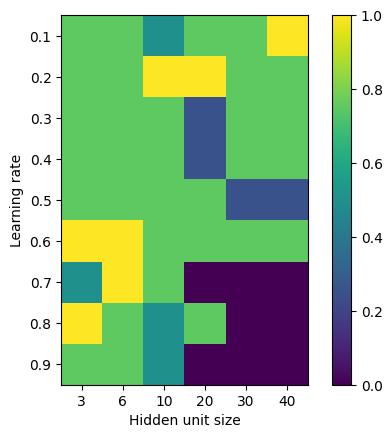

<Figure size 640x480 with 0 Axes>

In [3]:
hidden_unit_sizes = [3, 6, 10, 20, 30, 40]
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# plot alpha values against hidden unit size for the MLP on the XOR function
# use a scatter plot
total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def accuracy(network, I, t):
    # Calculate the accuracy of the model
    y_pred = np.round(network.forward(I))
    return np.mean(y_pred == t)

def train_and_evaluate(alpha, hidden_unit_size):
    # Create the MLP
    network = MultiLayerPerceptron(2, hidden_unit_size, 1)
    network.randomise()

    # Train the MLP
    for epoch in range(10000):
        network.train(X, y, alpha)

    # Calculate accuracy
    return accuracy(network, X, y)

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_evaluate(learning_rate, hidden_unit_size)

plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), hidden_unit_sizes)
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_alpha_units"
plt.savefig(f"{location}.png")



# Now we will train the MLP on a combination of inputs

In [4]:
def calculate_mse(predictions, actual_values):
    errors = predictions - actual_values
    squared_errors = errors * errors
    mse = np.mean(squared_errors)
    return mse

def calculate_mae(predictions, actual_values):
    errors = predictions - actual_values
    absolute_errors = np.abs(errors)
    mae = np.mean(absolute_errors)
    return mae


In [5]:
# Generate 500 vectors containing 4 components each. The value of each
# component should be a random number between -1 and 1. These will be
# your input vectors. The corresponding output for each vector should be
# the sin() of a combination of the components. Specifically, for inputs:
# [x1 x2 x3 x4]
# the (single component) output should be:
# sin(x1-x2+x3-x4)
# Now train an MLP with 4 inputs, at least 5 hidden units and one output
# on 400 of these examples and keep the remaining 100 for testing.

X = np.random.uniform(-1, 1, (500, 4))
y = np.sin(X[:, 0] - X[:, 1] + X[:, 2] - X[:, 3]).reshape(-1, 1)

mlp = MultiLayerPerceptronBig(4, 30, 60, 1, activation='tanh')
#mlp.randomise()

#print(mlp.forward(X[0]))
# Train the MLP
for epoch in range(10000):
    mlp.train(X[:400], y[:400], 0.85)

    if epoch % 1000 == 0:
        # print(f"Epoch {epoch} accuracy: {mlp.accuracy(X[400:], y[400:])}")
        # print(y[400:][0])
        print(f"MSE: {calculate_mse(mlp.forward(X[:400]), y[:400])}")
        print(f"MAE: {calculate_mae(mlp.forward(X[:400]), y[:400])}")
        print(f"accuracy: {mlp.accuracy(X[:400], y[:400])}\n")

# Calculate accuracy
print(mlp.accuracy(X[400:], y[400:]))

# test the MLP on the remaining 100 examples
print("Test set:")
print(f"MSE: {calculate_mse(mlp.forward(X[400:]), y[400:])}")
print(f"MAE: {calculate_mae(mlp.forward(X[400:]), y[400:])}")
print(f"accuracy: {mlp.accuracy(X[400:], y[400:])}")

print("\nsmall test set:")
print(mlp.forward(np.array([0.25, 0.5, 0.75, 1.0])), np.sin(0.25 - 0.5 + 0.75 - 1.0))
print(mlp.forward(np.array([0.5, 0.6, 0.7, 0.8])), np.sin(0.5 - 0.6 + 0.7 - 0.8))


ValueError: shapes (60,) and (20,) not aligned: 60 (dim 0) != 20 (dim 0)